<a href="https://colab.research.google.com/github/jafericy-statistics/collab_HW4/blob/main/HW4_JacobFericy_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework 4
Jacob A. Fericy

## Part 1: Student Math Performance Data
We begin by revisiting the StudentData dataset from the UCI ML Repository.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('default')
%matplotlib inline

In [ ]:
import pandas as pd
import numpy as np

url = "https://www4.stat.ncsu.edu/~online/datasets/StudentData.txt"

df = pd.read_csv(url, sep=';')
df.columns
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [ ]:
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


### Categorical Variable Visualization
We create stacked and side-by-side bar plots for selected categorical variables.

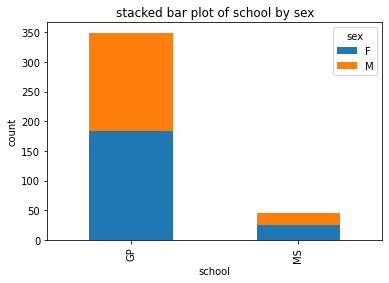

In [ ]:
pd.crosstab(df['school'], df['sex']).plot(kind='bar', stacked=True)
plt.title('stacked bar plot of school by sex')
plt.xlabel('school')
plt.ylabel('count')
plt.show()

This plot shows how male and female students are distributed across schools.

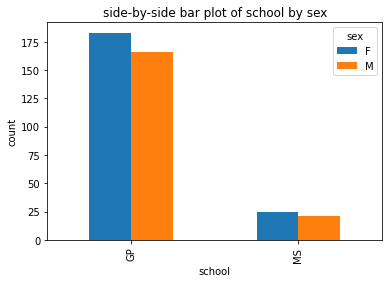

In [ ]:
pd.crosstab(df['school'], df['sex']).plot(kind='bar')
plt.title('side-by-side bar plot of school by sex')
plt.xlabel('school')
plt.ylabel('count')
plt.show()

Side-by-side bars make it easier to compare gender composition between schools.

### Numeric Variable Distributions Across Groups
We examine numeric variables across categorical groupings.

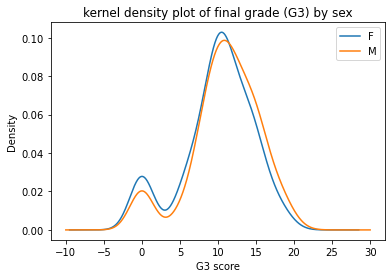

In [ ]:
for s in df['sex'].unique():
    df[df['sex'] == s]['G3'].plot(kind='kde', label=s)
plt.title('kernel density plot of final grade (G3) by sex')
plt.xlabel('G3 score')
plt.legend()
plt.show()

The KDE plot shows how final grades differ slightly between male and female students.

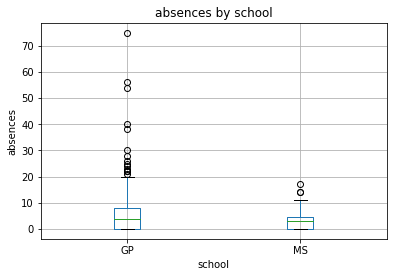

In [ ]:
df.boxplot(column='absences', by='school')
plt.title('absences by school')
plt.suptitle('')
plt.xlabel('school')
plt.ylabel('absences')
plt.show()

Boxplots highlight differences in absenteeism and outliers between schools.

### Scatterplots Relating G3 to Other Variables

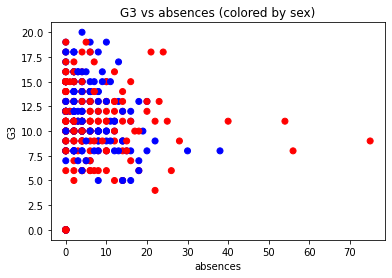

In [ ]:
colors = df['sex'].map({'M': 'blue', 'F': 'red'})
plt.scatter(df['absences'], df['G3'], c=colors)
plt.title('G3 vs absences (colored by sex)')
plt.xlabel('absences')
plt.ylabel('G3')
plt.show()

Higher absences generally correspond to lower final grades.

## Part 2: NFL Box Score Data
We now analyze NFL game data and explore trends over seasons and weeks.

In [ ]:
nfl = pd.read_csv("scoresFull.csv")
nfl.head()

,week,date,day,season,awayTeam,AQ1,AQ2,AQ3,AQ4,AOT,...,homeFumLost,homeNumPen,homePenYds,home3rdConv,home3rdAtt,home4thConv,home4thAtt,homeTOP,HminusAScore,homeSpread
0,1,5-Sep,Thu,2002,San Francisco 49ers,3,0,7,6,-1,...,0,10,80,4,8,0,1,32.47,-3,-4.0
1,1,8-Sep,Sun,2002,Minnesota Vikings,3,17,0,3,-1,...,1,4,33,2,6,0,0,28.48,4,4.5
2,1,8-Sep,Sun,2002,New Orleans Saints,6,7,7,0,6,...,0,8,85,1,6,0,1,31.48,-6,6.0
3,1,8-Sep,Sun,2002,New York Jets,0,17,3,11,6,...,1,10,82,4,8,2,2,39.13,-6,-3.0
4,1,8-Sep,Sun,2002,Arizona Cardinals,10,3,3,7,-1,...,0,7,56,6,10,1,2,34.40,8,6.0


In [ ]:
categorical_cols = ['homeTeam', 'awayTeam', 'day', 'stadium', 'startTime', 'toss', 'roof', 'surface']
for col in categorical_cols:
    nfl[col] = nfl[col].astype('category')
nfl.dtypes

week              object
date              object
day             category
season             int64
awayTeam        category
                  ...   
home4thConv        int64
home4thAtt         int64
homeTOP          float64
HminusAScore       int64
homeSpread       float64
Length: 82, dtype: object

### Regular Season Filtering and Summary

In [ ]:
nfl_reg = nfl[(nfl['week'] >= "1") & (nfl['week'] <= "17")]
nfl_reg.head()

,week,date,day,season,awayTeam,AQ1,AQ2,AQ3,AQ4,AOT,...,homeFumLost,homeNumPen,homePenYds,home3rdConv,home3rdAtt,home4thConv,home4thAtt,homeTOP,HminusAScore,homeSpread
0,1,5-Sep,Thu,2002,San Francisco 49ers,3,0,7,6,-1,...,0,10,80,4,8,0,1,32.47,-3,-4.0
1,1,8-Sep,Sun,2002,Minnesota Vikings,3,17,0,3,-1,...,1,4,33,2,6,0,0,28.48,4,4.5
2,1,8-Sep,Sun,2002,New Orleans Saints,6,7,7,0,6,...,0,8,85,1,6,0,1,31.48,-6,6.0
3,1,8-Sep,Sun,2002,New York Jets,0,17,3,11,6,...,1,10,82,4,8,2,2,39.13,-6,-3.0
4,1,8-Sep,Sun,2002,Arizona Cardinals,10,3,3,7,-1,...,0,7,56,6,10,1,2,34.40,8,6.0


In [ ]:
nfl_reg.groupby('season')['HFinal'].mean()

season
2002    23.338028
2003    23.570423
2004    22.697183
2005    22.084507
2006    19.472222
2007    23.415493
2008    22.788732
2009    22.300699
2010    23.140845
2011    24.084507
2012    24.757143
2013    24.892086
2014    22.456522
Name: HFinal, dtype: float64

Average home scores vary modestly by season.

In [ ]:
from typing import Callable
import time

def timeit(func):
    def wrapper(*args, **kwargs):
        start = time.time()
        result = func(*args, **kwargs)
        end = time.time()
        print(f'time: {end - start:.4f} seconds')
        return result
    return wrapper

@timeit
def plot_stat(df: pd.DataFrame, group_col: str, value_col: str, stat: Callable):
    summary = df.groupby(group_col)[value_col].apply(stat)
    summary.plot()
    plt.title(f'{stat.__name__} of {value_col} by {group_col}')
    plt.xlabel(group_col)
    plt.ylabel(value_col)
    plt.show()

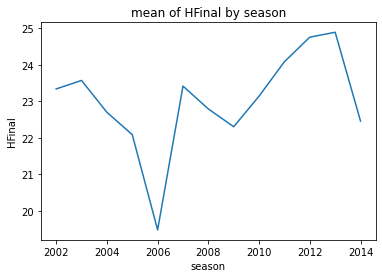

Execution time: 0.0830 seconds


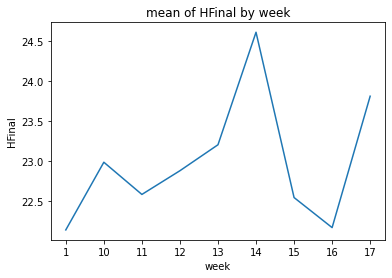

Execution time: 0.0922 seconds


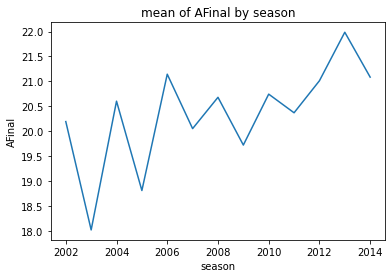

Execution time: 0.1160 seconds


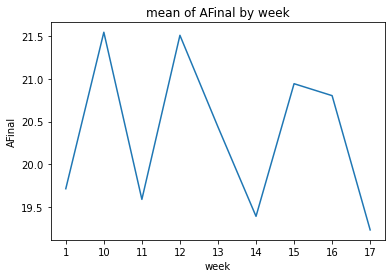

Execution time: 0.0987 seconds


In [ ]:
plot_stat(nfl_reg, 'season', 'HFinal', pd.Series.mean)
plot_stat(nfl_reg, 'week', 'HFinal', pd.Series.mean)
plot_stat(nfl_reg, 'season', 'AFinal', pd.Series.mean)
plot_stat(nfl_reg, 'week', 'AFinal', pd.Series.mean)